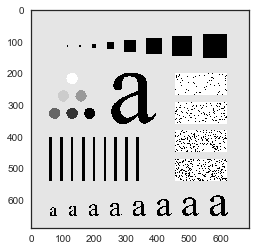

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


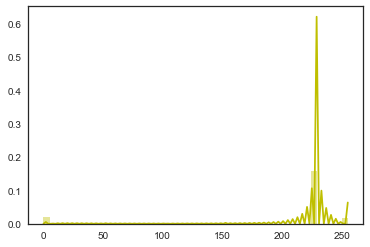

In [2]:
%matplotlib inline
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from scipy.linalg import solve
import seaborn as sns
sns.set_style("white")
im = Image.open('C:/Users/user/Documents/DIP/DIP3E_Original_Images_CH04/Fig0441(a)(characters_test_pattern).tif')
im = np.asarray(im.convert('L'))
plt.imshow(im)
plt.gray()
plt.show()
ax = sns.distplot(im.flatten(), color="y")

In [4]:
P = im.shape[0]*2
Q = im.shape[1]*2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in true_divide


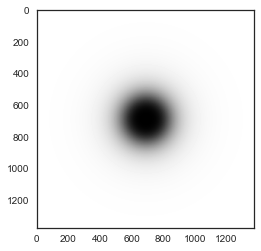

In [38]:
def ButterWorth_Filter(shape,D0,n):
    D = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            D[i][j] = np.sqrt(np.square(i-shape[0]/2)+np.square(j-shape[1]/2))
    H = 1/(1+np.power(D0/D,2*n))
    return H

BHPF = ButterWorth_Filter((P,Q),160,2)
plt.imshow(BHPF)
plt.gray()
plt.show()

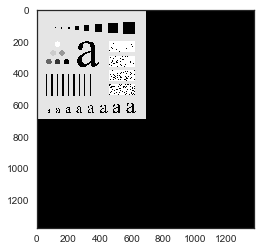

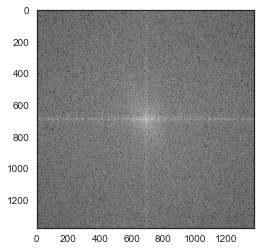

In [39]:
#1 填補原圖，成(2M,2N)
im_p = np.zeros((im.shape[0]*2,im.shape[1]*2))
im_p[:im.shape[0],:im.shape[1]] = im.copy()
plt.imshow(im_p)

plt.show()
# 平移頻率至中央
for i in range(im_p.shape[0]):
    for j in range(im_p.shape[1]):
        im_p[i][j] = im_p[i][j]*np.power(-1,i+j)
#計算DFT
fft_f = np.fft.fft2(im_p)
plt.imshow(1+np.log10(np.abs(fft_f)))
plt.show()

In [40]:
revert_im = np.real(np.fft.ifft2(np.multiply(fft_f,BHPF)))
for i in range(revert_im.shape[0]):
    for j in range(revert_im.shape[1]):
        revert_im[i][j] = revert_im[i][j]*np.power(-1,i+j)

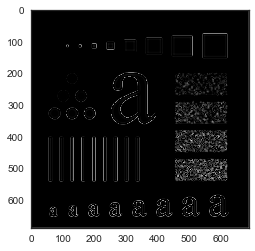

[[  0.00000000e+00   0.00000000e+00   6.98415011e-03 ...,   8.01361724e+00
    3.68299800e+01   8.50353694e+01]
 [  0.00000000e+00   5.52699628e-03   1.78481247e-02 ...,   8.01359190e+00
    3.68299551e+01   8.50353497e+01]
 [  3.13185284e-03   1.45528211e-02   3.31621681e-02 ...,   8.01361668e+00
    3.68299795e+01   8.50353689e+01]
 ..., 
 [  8.01358423e+00   8.01355988e+00   8.01358475e+00 ...,   1.88762636e+01
    4.59628817e+01   9.09667430e+01]
 [  3.68300121e+01   3.68299861e+01   3.68300105e+01 ...,   4.59628817e+01
    6.93902482e+01   1.08697803e+02]
 [  8.50353381e+01   8.50353194e+01   8.50353388e+01 ...,   9.09667430e+01
    1.08697803e+02   1.38573008e+02]]


In [41]:
revert_im[revert_im>255] = 255
revert_im[revert_im<0] = 0
plt.imshow(revert_im[:im.shape[0],:im.shape[1]])
plt.show()
print(revert_im[100:im.shape[0],100:im.shape[1]])

In [42]:
print(BHPF.shape)
print(im.shape)

(1376, 1376)
(688, 688)
